<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202510_AML/blob/main/Laboratorios/Laboratorio_3/MINE_4206_202510_AML_Lab3_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

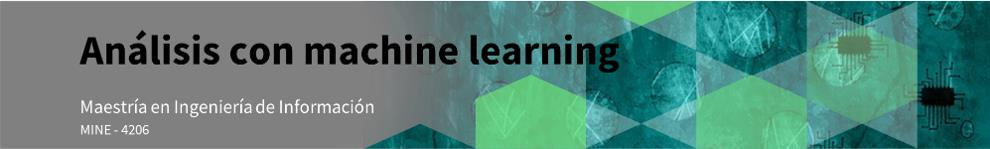

**Tutores**.
* Nicolás Tibatá Casteñeda.
* Fabián Camilo Castellanos P.

#Tabla de contenido

[Contexto y objetivos.](scrollTo=opGTmPf8s2Fw)<br>
[Configuración del entorno local.](#scrollTo=NT4ob2Ax69ND)<br>
[Diseño e Implementación](#scrollTo=NT4ob2Ax69ND)<br>
[Despliegue en cloud](#scrollTo=x2aYiBUtFdxd)<br>


---
# Contexto y objetivos.

Las agencias de viaje a raíz de la pandemia quieren incursionar en el negocio de los seguros de viaje, por esta razón ha recolectado la información de sus clientes para identificar las acciones de mejora e implementar nuevas estrategias para la adquisición de este tipo de seguros.


**Objetivos:**

* Resolver un problema de Aprendizaje de Datos.
* Revisar los conceptos básicos de una clasificación.
* Comprender el comportamiento de los clientes e identificar oportunidades de mejora.
* Publicar un aplicativo web que permita hacer uso del mejor modelo y permitir al usuario clasificar los textos.

La fuente de los datos la puedes encontrar en [Travel insurance prediction data](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data).

# Pautas y recomendaciones.

Las pautas principales y comunes para estos problemas en el ML son los siguientes:

*   La organización plantea una necesidad que busca resolver.
*   En caso que tenga solución en el contexto de Machine Learning, en primer lugar debe desarrollarse todo el trabajo necesario que permita desarrollar este modelo.
*   Teniendo en cuenta el desarrollo del modelo, será posible exportar la información para que sea consumida en un aplicativo web para permitir el acceso al usuario final.
*   Las aplicaciones a desarrollar deben contar con el proceso de Ingeniería de software: conceptualización, implementación y pruebas.



Para el desarrollo de este laboratorio, debes tener en cuenta lo siguiente:

*   La asignatura no es está orientada a un curso de programación, por consiguiente no estará documentado todo el proceso.
*   Para facilitar o familizar este funcionamiento, haremos uso de la librería Streamlit.
*   El problema a resolver es el mismo desarrollado en las sesiones 2 y 3 del laboratorio 2, por esta razón contarás con el modelo de solución planteado y así lo llevaremos al aplicativo web.
*   Una vez ha sido asegurado el mejor modelo, deberás persistir la información en un archivo al que pueda tenerse el acceso para realizar las predicciones.

Para el ítem anterior y en el contexto de keras, debes tener en cuenta el modo en el que almacenarás la información. Los métodos disponibles son los siguientes:

*  SavedModel.
*  HDF5.
*  Pickle.

En términos de funcionalidad y propósito. A continuación, encontrarás las diferencias clave entre los formatos:

1. **SavedModel**:
   - **Propósito**: El formato `SavedModel` es específico de TensorFlow y está diseñado para guardar modelos de aprendizaje automático, incluyendo su estructura, parámetros, gráficos de computación y metadatos. Está optimizado para la interoperabilidad y la reutilización en entornos de TensorFlow.
   - **Portabilidad**: Puede ser utilizado en diferentes entornos de TensorFlow, incluyendo TensorFlow en Python, TensorFlow en C++, TensorFlow Serving y otros. Esto lo hace ideal para la implementación en una variedad de plataformas y servicios de producción.

2. **HDF5 (H5)**:
   - **Propósito**: El formato HDF5 es un formato de archivo de datos jerárquico utilizado para almacenar una amplia variedad de datos científicos y estructurados. En el contexto de modelos de aprendizaje automático, se utiliza para guardar la arquitectura del modelo (capas, conexiones, etc.) y los valores de los pesos del modelo.
   - **Portabilidad**: Puede ser utilizado en diferentes bibliotecas y lenguajes, no solo en TensorFlow. Esto lo hace útil para la interoperabilidad entre diferentes frameworks y herramientas de aprendizaje automático.

3. **Pickle (PCKL)**:
   - **Propósito**: El formato `Pickle` es un módulo de serialización de Python que se utiliza para guardar y cargar objetos de Python. Puede utilizarse para guardar objetos en general, incluyendo modelos de aprendizaje automático. Sin embargo, no está diseñado específicamente para modelos de aprendizaje automático y no almacena información sobre la arquitectura de un modelo ni su gráfico de cómputo.
   - **Portabilidad**: Puede ser utilizado dentro de Python y es adecuado para guardar y cargar objetos de Python, pero no es tan adecuado para la interoperabilidad entre diferentes lenguajes o entornos.

En el caso de almacenar modelos u objetos de `sklearn`, puedes apoyarte de `joblib`.

Debes tener en cuenta que una vez almacenas el modelo, en el caso que requieras cargar el modelo para su uso, deberás usarlo en las mismas condiciones para los que el modelo fue diseñado, de lo contrario no funcionará y generará errores.

Existen muchas posibilidades de generación para estos modelos, por lo tanto para este laboratorio estaremos enfocados en los pasos que permiten hacer uso del modelo de red neuronal para la clasificación de textos.

Nos restan 2 pasos, configurar e implementar localmente y el despliegue en nube (cloud) del desarrollo obtenido.


`NOTA`: Si eres desarrollador, seguramente el código puede optimizarse, ser aún más parametrizable, pero no olvides que hay compañeros aún iniciando en este mundo 😉.

# Diseño e implementación

## Conceptualización.

### Requerimientos de usuario.

No es redundante mencionar en este punto, acerca de los requerimientos funcionales que tendrá la aplicación, debemos tener clara la proyección de la aplicación a desarrollar.

En los objetivos del notebook identificamos la necesidad si es asegurada o no la persona con valores Si o no, representado en valores numéricos:

* 0
* 1

De esta forma el usuario esperaría ingresar un fragmento del documento y conforme los datos allí descritos, le indicaremos al usuario a cuál de las 5 categorías con las que fue entrenado pertenece y cuál es el porcentaje de acierto correspondiente.

### Diseño e implementación.

Siempre será importante generar un boceto o un prototipo que permita expresar la base de diseño que esperamos programar, en nuestro caso será la siguiente:

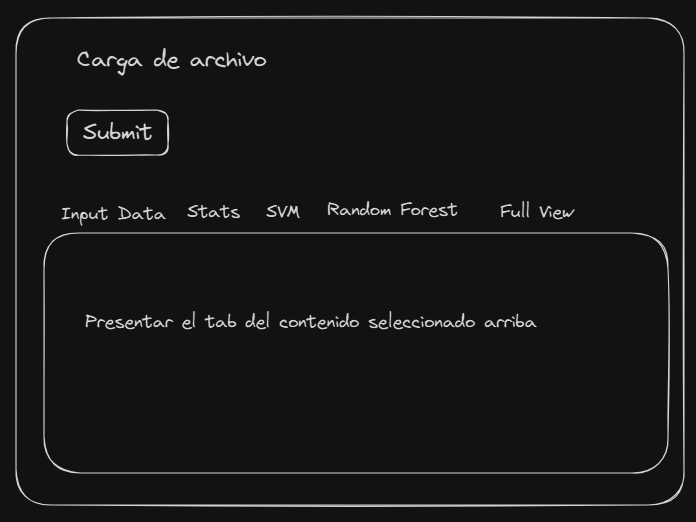

La presentación de resultados, una vez usamos el botón, sería con pestañas, por lo tanto debe variar el contenido al interior conforme vamos seleccionando la opción:

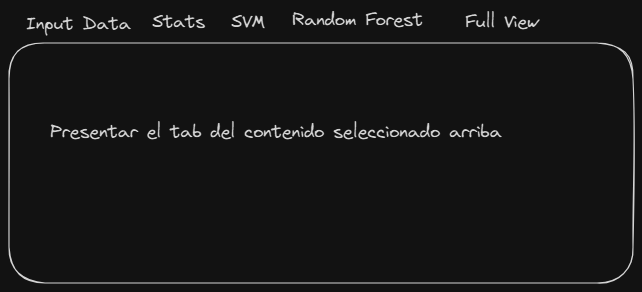

**TIP**: No inicies desarrollo o aprendizaje sobre una librería específica, como podría ser streamlit, es muy importante dedicar el tiempo necesario (que no es tan amplio como puediera pensarse) para tener esta base antes de ir a desarrollar o a implementar.

## Configuración del entorno local.

### Librerías.

En términos generales, siempre deberás tener en cuenta los siguientes elementos:

* Versión de python sobre la cuál será desarrollada la aplicación.
* Librerías sobre la cuál fue desarrollado el modelo.
* Librería(s) para la interfaz gráfica (UI).
* Otras librerías.

En este orden de ideas y para este notebook, para cada una de las anteriores, relacionaremos la información correspondiente:

* Versión de python sobre la cuál será desarrollada la aplicación: **3.11**.
* Librerías sobre la cuál fue desarrollado el modelo: scikit-learn.
* Librería(s) para la interfaz gráfica (UI): streamlit.
* Otras librerías: Ninguna.

**NOTA**

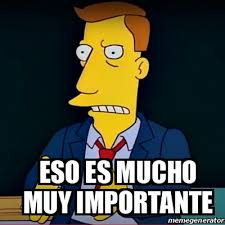

Antes de iniciar el desarrollo, debes verificar en tu ambiente de despliegue, la compatibilidad de las librerías, sus versiones para evitar sorpresas y contratiempos.

### Estructura del proyecto.

Para este ejercicio, usaremos la siguiente estructura:

```python
Proyecto/
  resources/
    batch/
      streamlit.bat
    data/
      test_data.xlsx
    models/
      rf_model.joblib
      svc_model.joblib
  src/
    back/
      ModelController.py
    model/
      DataPreprocessing.py
  streamlit_app.py
  requirements.txt
```

**TIP**: Tu ambiente podrá estar configurado con un patrón de desarrollo, configuraciones, entre otros que consideres necesarios, deberás asegurar se encuentren en armonía con el despliegue.

Carpeta de recursos.

```python
Proyecto/
  resources/
    models/
      rf_model.joblib
      svc_model.joblib
    data/
      test_data.xlsx      
```

Esta carpeta tendrá como propósito almacenar el modelo de la red neuronal y la información del TF-IDF junto con el PCA. De esta forma usará la información del entrenamiento y será apoyo para presentar los nuevos datos al modelo.

Por su parte, en la carpeta de datos, hemos dejado un archivo excel con los datos test para realizar todas las pruebas de la aplicación.

Archivo de requisitos o requerimientos:

```python
Proyecto/
  requirements.txt
```

Este archivo tendrá la responsabilidad de registrar las librerías que usarás en el desarrollo. Recuerda que debe coincidir con tu **pyenv**, esto quiere decir que al registrar una librería en este archivo, debe estar correctamente instalada en tu ambiente local.

Clase de preprocesamiento de los datos:

```python
Proyecto/
  src/
    model/
      DataPreprocessing.py
```

Archivos de modelamiento en la carpeta de recursos y la clase python encargada de procesar la lógica del modelo:

```python
Proyecto/
  resources/
    models/
      rf_model.joblib
      svc_model.joblib
  src/
    back/
      ModelController.py

```

`streamlit_app.py` es el erchivo principal del aplicativo web, desde allí realizaremos los llamados a los componentes de streamlit.

El archivo bat en tu entorno local te ayudará a lanzar el aplicativo:

```python
Proyecto/
  resources/
    batch/
      streamlit.bat
  streamlit_app.py
```

### Ejecución local.

El archivo bat de la carpeta de recursos hace uso de la variable de entorno `PYTHONPATH` que deberás tener configurada en tu ambiente local, en otras palabras, corresponde a la ruta dónde está instalado python en tu máquina.



¿Recuerdas el archivo `requirements.txt`?, en la ruta de `PYTHONPATH` debes tener instaladas todas las librerías que requieres para que la aplicación pueda ser desplegada en streamlit.

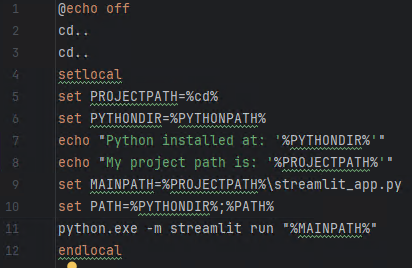

Las instrucciones anteriores asegurarán la identificación de la ruta del proyecto mediante rutas relativas e invocar el comando streamlit para ejecución del aplicativo localmente. Deberás encontrar una línea de comandos de la siguiente forma:

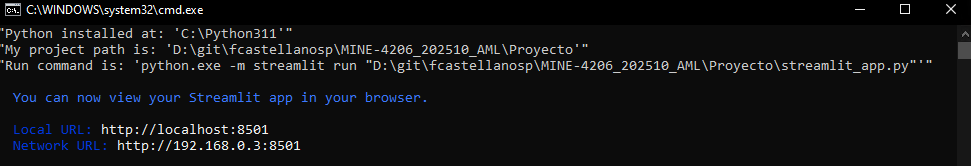

Esta ventana será de mucha utilidad, pues allí no sólo encontrarás la ruta de despliegue local, sino que además registrará todos los eventos de la aplicación, mientras la ventana se mantenga activa.

En resúmen:

* Para la demostración, la ruta `PYTHONPATH` se encuentra instalada en la ruta `c:\Python311`
* Mi proyecto se encuentra en la ruta `D:\git\fcastellanosp\MINE-4206_202510_AML\Proyecto`.
* Para lanzar la aplicación, en ningún momento fue necesario fijar la ruta, el archivo bat tiene las instrucciones necesarias para asignarlo en una variable.
* `MAINPATH`es el resultado de la ruta del proyecto y el nombre del archivo python principal de la aplicación (código streamlit).
* La instrucción final `python.exe -m streamlit run "%MAINPATH%"` asegura que lances exitosamente el aplicativo.

### Implementación

Para los desarrollos siempre es sugerido hacer uso de un IDE (entorno de desarrollo) con miras a codificar mejor, depurar (debug), encontrar errores con mayor facilidad, entre otras ventajas.

En este caso daremos un vistazo desde pycharm al proyecto.

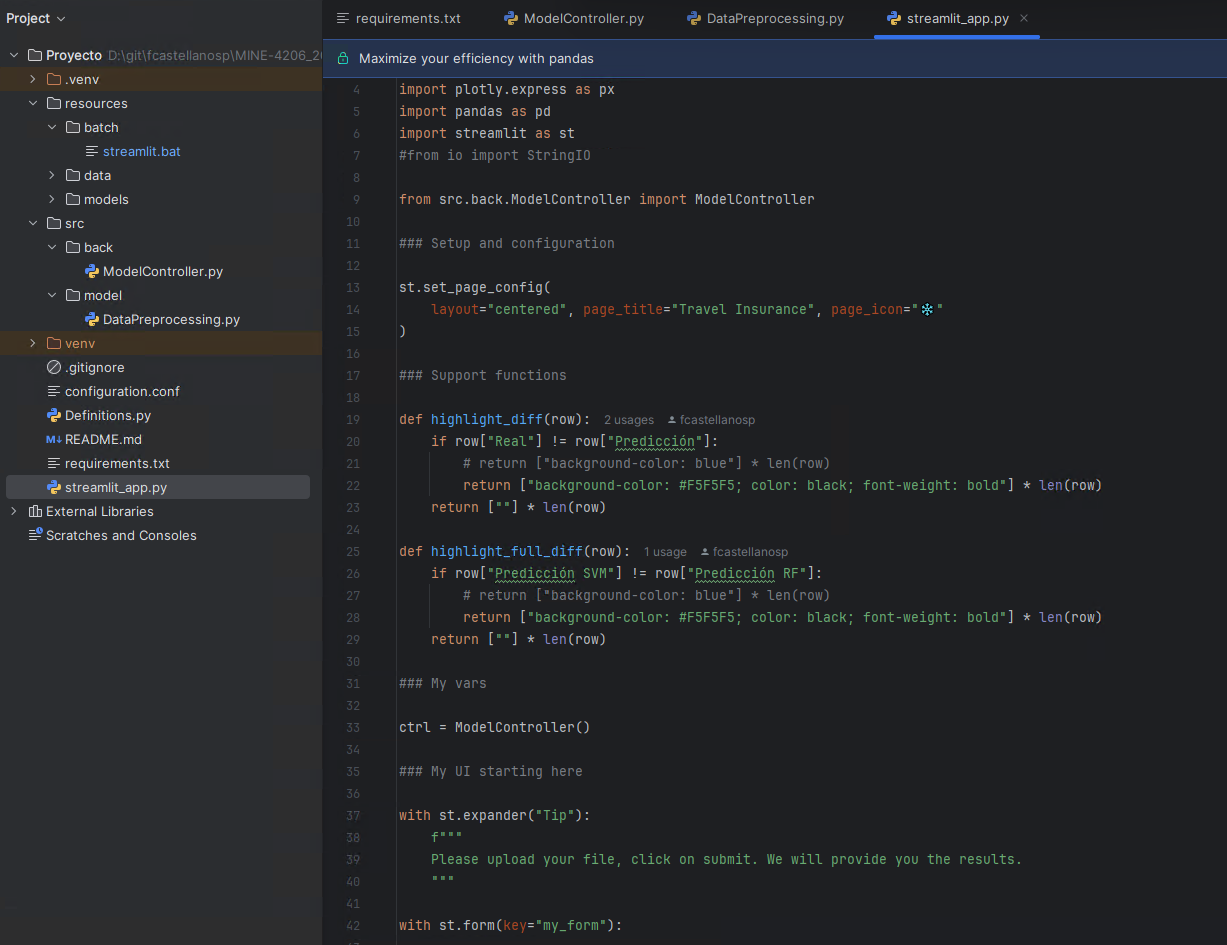

Sin embargo, es posible que puedas cargar este mismo código por ejemplo con Visual Studio Code, desde que la variable de entorno mencionada anteriormente, se encuentre correctamente configurada.

Streamlit cuenta con documentación de sus controles, en la [siguiente dirección](https://streamlit.io/components), junto con una amplia [galería de ejemplos](https://streamlit.io/gallery).

Continuando con el desarrollo, hemos hecho uso de los siguientes controles:

* expander: Elemento que permite expandir/"colapsar" información de interés. En nuestro caso el tip al usuario.
* form: Todo lenguaje de programación cuenta con formularios, allí estará la base principal de interacción como punto de comunicación entre el usuario final y el modelo.
* tab: Permite presentar la información como pestañas o tabs.
* button: Nombrado como sumbit, lo encuentras dentro del formulario y desencadena el evento de llamado cuándo el formulario está listo para usar.
* spinner: Es una animación que permitirá informar al usuario acerca de esperar.

Dado que una buena práctica de desarrollo corresponde a que la interfaz no cuente con lógica de aplicación, por lo tanto hemos delegado en la línea 33 a la variable ctrl que instancia de la clase `ModelController`. Es realmente esta clase quién sabe qué hacer con la información del texto diligenciado por el usuario. Ya continuaremos hablando de esta clase más adelante.

En la línea 59 encontrarás la variable `ctrl` invocando el método `load_input_data` dónde la información del archivo csv es enviada para que sea interpredado en la clase.

En la línea 72 encontrarás a la misma variable `ctrl` invocando al método predict, recibiendo como parámetro el texto diligenciado por el usuario.

Las líneas 19-29 mejoran la presentación del dataframe para el resaltado (highlight) de las celdas con información relevante.

Ahora hablemos de la clase `ModelController`, cuyo constructor instancia 3 rutas, cada una de ellas a los objetos obtenidos del notebook de entrenamiento, de la siguiente forma:

* `model_path`: Registra la ruta de los modelos para RandomForest y SVM.
* `rf_model_path`: Ruta asociada al archivo con el modelo entrenado y generado con `RandomForest`.
* `svc_model_path`: Ruta asociada al archivo con el modelo entrenado y generado con `SVM`.

En el mismo constructor son aseguradas las variables para cada uno de los 3 componentes anteriores, así como la instancia de la clase de procesamiento de texto.

En el método predict, preparamos la información con el siguiente flujo:

* Partición de los datos para `X`e `Y`.
* Bloque de código para la predicción de `SVM`, probabilidades y transformación de escala 0 a 100 de las anteriores.
* Preparar y generar un dataframe que toma los datos originales y adiciona las columnas Real (Valor `Y`), Predicción con el clasificador `SVM`, Probabilidad para la clase 0 y para la clase 1.
* Bloque de código para la predicción de `RandomForest`, probabilidades y transformación de escala 0 a 100 de las anteriores.
* Preparar y generar un dataframe que toma los datos originales y adiciona las columnas Real (Valor `Y`), Predicción con el clasificador `RandomForest`, Probabilidad para la clase 0 y para la clase 1.
* Bloque de código que toma los datos originales y adiciona las columnas de dato real en Y, predicciones y probabilidades para ambos modelos.

`DataPreprocessing` por su parte, corresponde a la información de la clase que permite generar el código necesario para .

En resúmen, tenemos lo siguiente hasta el momento:

* `streamlit_app.py` como archivo principal, presenta la información y la captura en una variable como parte de su labor.
* La instancia `ctrl` de la clase `ModelController` es invocada desde la clase principal `streamlit_app.py` y es la responsable de llamar los recursos de modelamiento.
* `DataPreprocessing` se encargará de leer el contenido del CSV y permite a `ModelController` trabar con los conjuntos de datos `X` e `Y` completamente listos.

La interfaz implementada, ha sido construida de la siguiente forma:

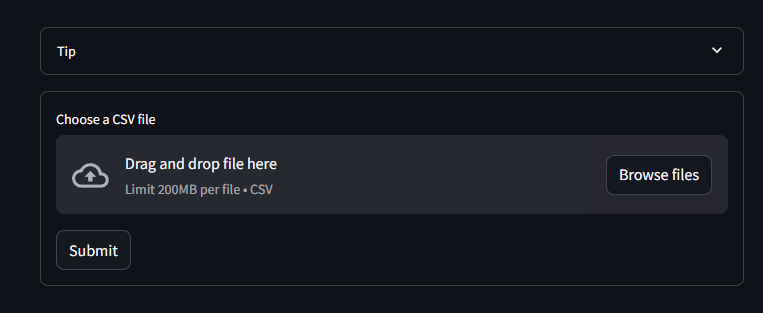

A diferencia del prototipo, la interfaz cuenta con algunos elementos adicionales, en pro de mejorar la experiencia al usuario.

### Asegura tu código en Git.

Una de las condiciones de streamlit para su publicación en nube (para cuentas gratuitas), será contar con un repositorio público en GIT para desde allí obtener la información para su despliegue. Asegura que se encuentre en estas condiciones.

En el caso de este laboratorio, lo encontratás en la `raíz de este repositorio`, en la carpeta `Proyecto`.

# Despliegue en nube (cloud)

Toda la documentación la podrás encontrar directamente en la [página](https://streamlit.io/cloud).

Es posible que en algunos pasos, la herramienta te solicite confirmación de acceso a tu cuenta de github.

Es necesario formar parte de la comunidad, para el cuál podrás mediante una cuenta google, con tu cuenta de github o un correo específico.

1. Crea la aplicación usando la opción "*Deploy a public app from GitHub*", seguido de "*Use existing repo*".



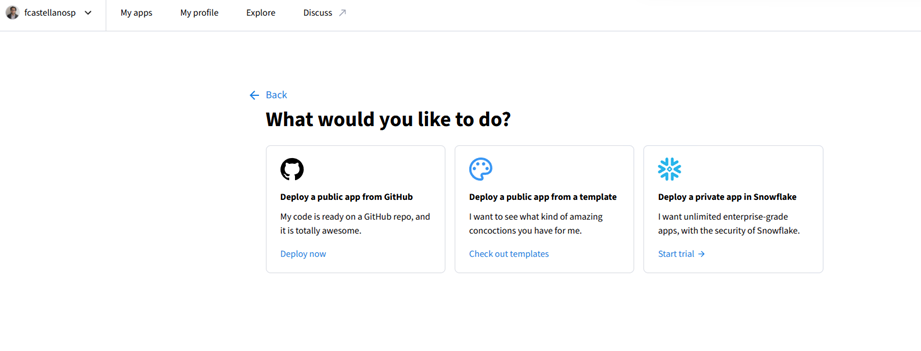

2.   Selecciona el repositorio de GIT que deseas desplegar junto con el archivo principal de la aplicación.

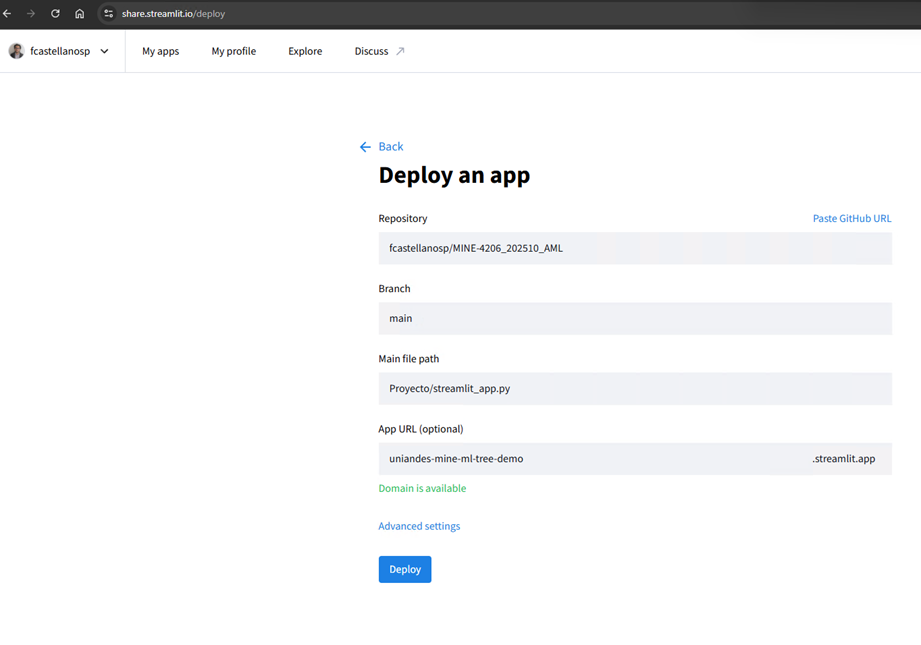

Asegura la versión de python

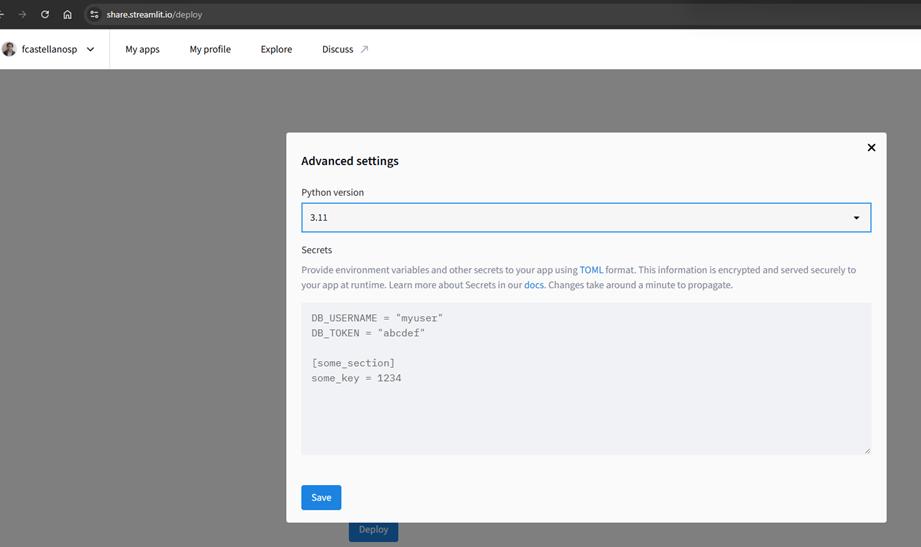

3. Selecciona la opción desplegar *Deploy*:

El nombre de la aplicación será: uniandes-text-classifier

Usaremos la [dirección desplegada](https://uniandes-mine-ml-tree-demo.streamlit.app/)



4. Inicia el proceso de calidad (pruebas).

Verifica el funcionamiento de la aplicación sobre el despliegue realizado.

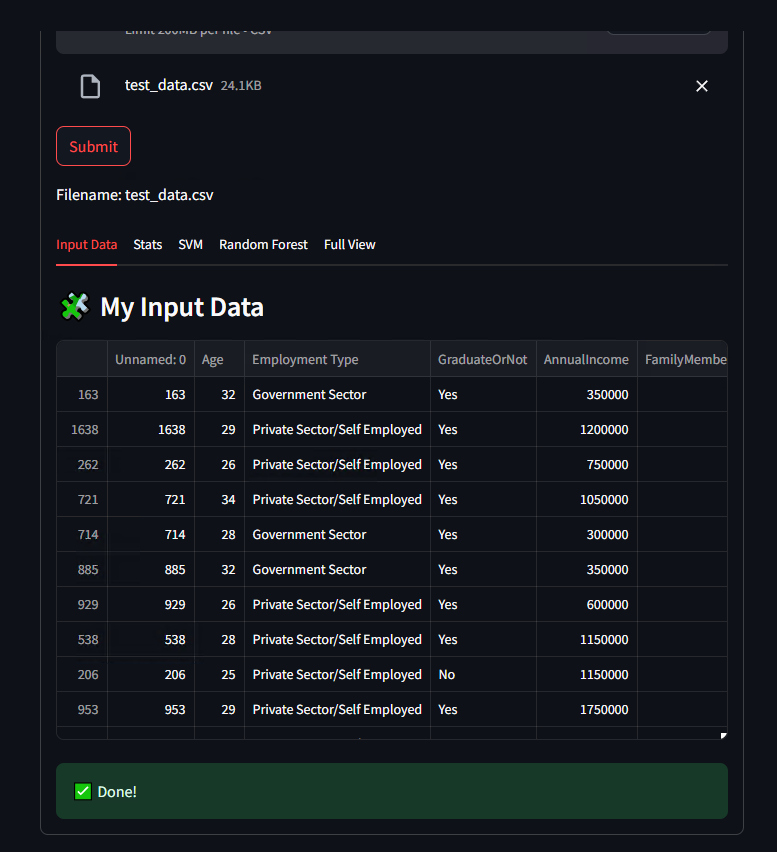

**NOTA**: En caso que se presenten errores, presta atención a las versiones y toda la configuración de las librerías se encuentren con las mismas condiciones de desarrollo o del ambiente [local](#scrollTo=hO-15notFL93)

# Hands On

Realiza el siguiente flujo:

* Clona el código en tu equipo local.
* Instala el IDE o entorno de desarrollo de preferencia, sugerimos PyCharm.
* Instala python 3.11 en tu equipo local.
* Configura la variable de entorno `PYTHONPATH` en tu equipo local.
* Ejecuta la aplicación apoyándo te del archivo *.bat en la carpeta de recursos.
* Verifica los resultados obtenidos localmente y el despliegue.

Cuándo logres exitosamente los pasos anteriores:
* Crea una cuenta en streamlit.
* Despliega este mismo código con tu cuenta.
* Verifica los resultados.